In [41]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids, and separate the dataset:

In [42]:
from implementations import *

In [43]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)


In [44]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [45]:
logistic = True
tX_list, ids_list, y_list = separate_dataset(tX, ids, y, logistic)

In [ ]:
k = 5
for i in range(tX_list[k].shape[1]):
    plt.figure()
    sns.histplot(np.where(y_list[k] == 0, tX_list[k][:,i], np.nan), color ='r', alpha = 0.5, stat = 'density', bins = 40)
    sns.histplot(np.where(y_list[k] == 1, tX_list[k][:,i], np.nan), color ='b', alpha = 0.5, stat = 'density',  bins = 40)
    plt.title('feature {k}'.format(k =i))
    #plt.xlim([0, 250])
    plt.show()

In [58]:
tX_list[0]=np.delete(tX_list[0], [2,4,7,10,13,15], axis=1)
tX_list[1]=np.delete(tX_list[1], [3,5,11,14,16,17], axis=1)
tX_list[2]=np.delete(tX_list[2], [7,9,10,12,13,15,16,17,19], axis=1)
tX_list[3]=np.delete(tX_list[3], [3,5,6,11,12,14,15,16,17,18,20,21], axis=1)
tX_list[4]=np.delete(tX_list[4], [10,15,16,17,18,19,23,24,26], axis=1)
tX_list[5]=np.delete(tX_list[5], [3,8,9,10,15,16,18,19,20,21,22,24,25,27,28], axis=1)

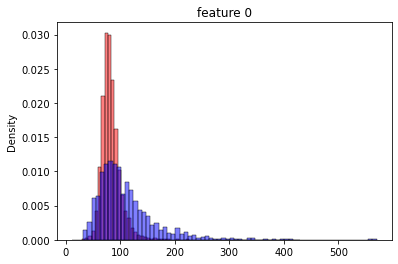

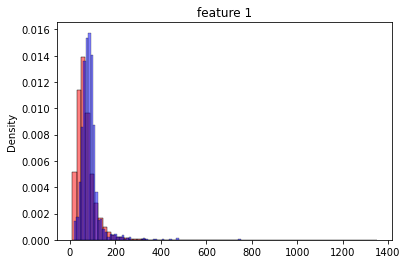

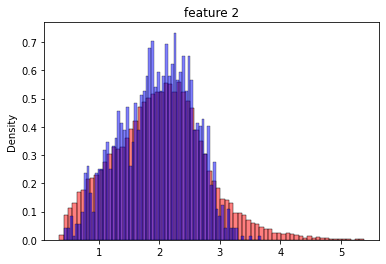

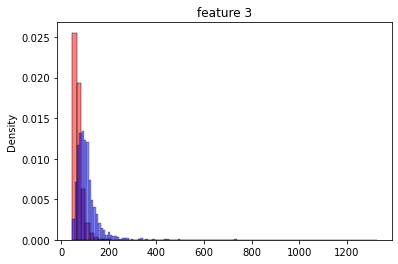

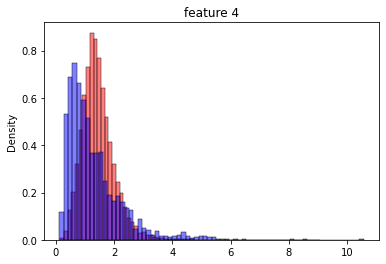

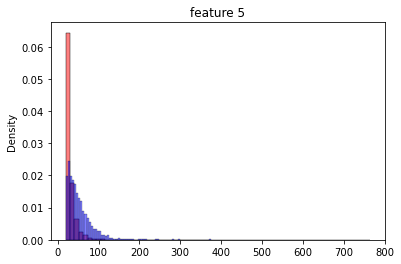

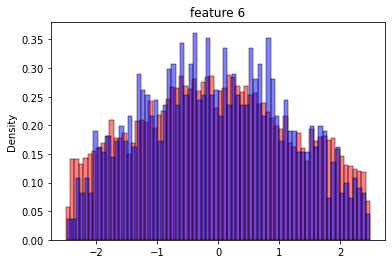

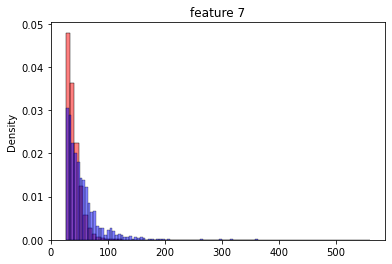

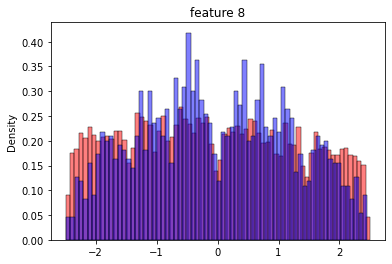

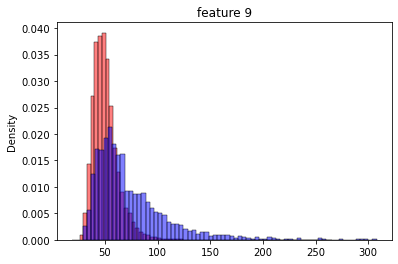

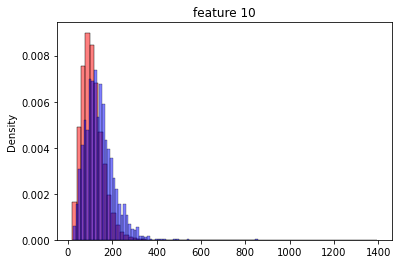

In [61]:
k = 0
for i in range(tX_list[k].shape[1]):
    plt.figure()
    sns.histplot(np.where(y_list[k] == 0, tX_list[k][:,i], np.nan), color ='r', alpha = 0.5, stat = 'density', bins = 70)
    sns.histplot(np.where(y_list[k] == 1, tX_list[k][:,i], np.nan), color ='b', alpha = 0.5, stat = 'density',  bins = 70)
    plt.title('feature {k}'.format(k =i))
    #plt.xlim([0, 250])
    plt.show()

In [5]:
# We Separate the dataset
from implementations import *

tX_list, ids_list, y_list = separate_dataset(tX, ids, y, True)
tX_test_list, ids_test_list = separate_dataset(tX_test, ids_test) 

## Grid Search